# AM207 Homework 2

##### Data: wine_quality_missing.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 22nd, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [2]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(16, 12)})

## Question 1: Give Me the Full Monte, Carlo Ancelotti

**Coding required**

In the quiet moments that transpire just before the sun rises that find us taking the walk of shame we can only send up quiet prayers to deities unknown that our path has not unknowingly taken us down the Boulevard of Broken Dreams (*Green Day*).  Along this road you'll find scattered the shattered hearts of formerly aspiring humorists -- the sorts of folk who might admire "the giggle at a funeral" (*Hozier*) distributed according to the function $\heartsuit(\theta) \sim \frac{ {\rm sin^{24}}\theta}{\theta^2}$ from $0< \theta< \infty$ and otherwise.  As a current aspiring humorist, it is your job to try to integrate $\heartsuit(\theta)$ in order to size up the jar you'll take with you as you go heart collecting (*Christina Perri*).  Who do you think you are anyway?

1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.

1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over the bounded domain [0, M] and get an accurate result.  What value of M should you choose to get a result within 0.001 of the exact solution?

1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?

1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?

1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times. Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.  

1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?

1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $

1.8. Based on your answer in 1.7 was your choice of M justified? 

### Answers

<div class="answer-separator">
------------------------
</div>

<h4>1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5,1,'$\\heartsuit(\\theta)$ as function of $\\theta$')

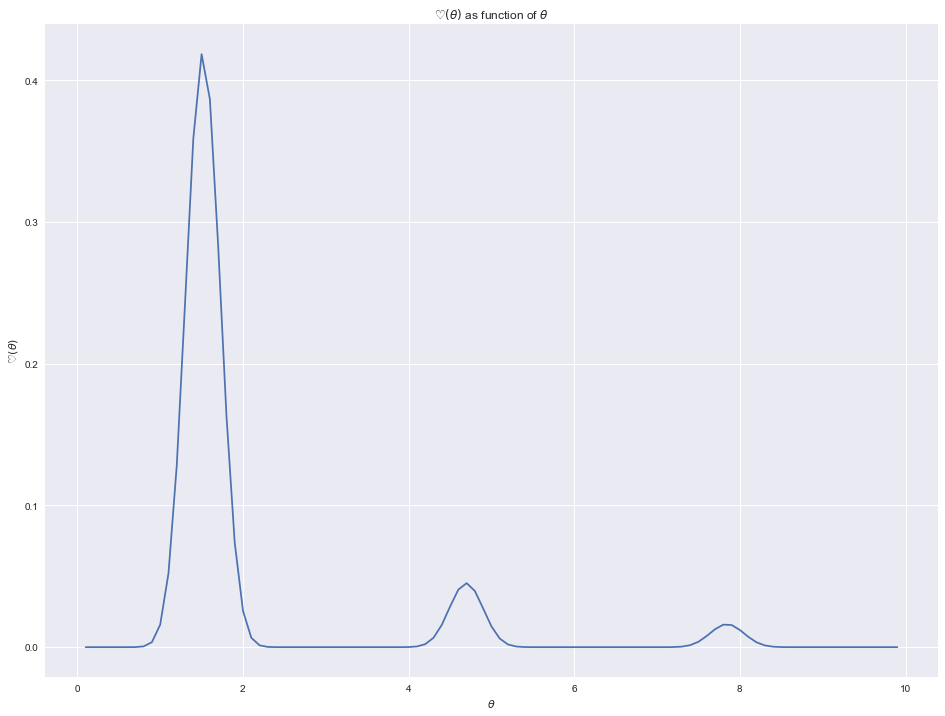

In [3]:
f = lambda theta: np.power(np.sin(theta), 24) / np.power(theta, 2)
thetas = np.arange(0, 10, 0.1)
plt.plot(thetas, f(thetas))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\heartsuit(\theta)$')
plt.title(r'$\heartsuit(\theta)$ as function of $\theta$')

<div class="answer-separator">
------------------------
</div>

<h4>1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over a bounded domain and get an accurate result.  What bounds should you choose to get a result within 0.001 of the exact solution?</h4>

<div class="answer">

<br>
Note that $\int_0^\infty \heartsuit(\theta) d\theta = \int_0 ^ M \heartsuit(\theta) d\theta + \int_M ^ \infty \heartsuit(\theta) d\theta \forall M \in \mathbb R\:$. Thus $\int_0^\infty \heartsuit(\theta) d\theta - \int_0 ^ M \heartsuit(\theta) d\theta = \int_M ^ \infty \heartsuit(\theta) d\theta \:.$ So, if we can determine an $M \in \mathbb R$ such that $\int _M ^ \infty \heartsuit(\theta) d \theta < 0.001$, we know that the integral over the finite domain comes close to $0.001$ of the true integral.
<br>
<br>
Now, use the fact that a pointwise bound implies an integrated bound:

$$f(x) \leq g(x) \forall x \in \mathbb R \Longrightarrow \int f(x) dx \leq \int g(x) dx \:,$$

where the integral can be taken over *any* domain.
<br>
Furthermore, $\sin^{24}(\theta) \leq 1 \forall \theta$, so we have that $\heartsuit(\theta) = \sin^{24}(\theta) \frac{1}{\theta ^ 2} \leq \frac{1}{\theta ^ 2}$. This allows us to use $f(x) = \frac{1}{x^2}$ in the inequality above with $g(x) = \heartsuit(x)$.
<br>

Then

$$\int_M ^ \infty \heartsuit(\theta) d\theta \leq \int_M ^ \infty \frac{1}{\theta^2} d\theta = - \theta ^ {-1} \bigg\rvert_M ^ \infty = \frac{1}{M} \:.$$

We want $\frac{1}{M} = 0.001 \Leftrightarrow M = 1000$. 
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?</h4>

<div class="answer">

<br>
<br>

</div>

In [18]:
def simulate_heart_collection(N, M=1000, seed=0):
    """
    Simulate 
    """
    np.random.seed(seed)
    x = np.random.uniform(low=0, high=M, size=N)
    y = f(x)
    return y.mean() * M
    
simulate_heart_collection(100000)

0.287765597431598

<div class="answer-separator">
------------------------
</div>

<h4>1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?</h4>

In [17]:
n = 12
exact = np.pi / (np.power(2, 2 * n - 1)) * scipy.special.binom(2 * n - 2, n - 1)
exact

0.26418924198235927

<div class="answer">

<br>
We came close to around 0.02. By the computation above, this must come from sampling variation.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times.  Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

In [9]:
repeated = [simulate_heart_collection(100000, seed=seed) for seed in range(1000)]


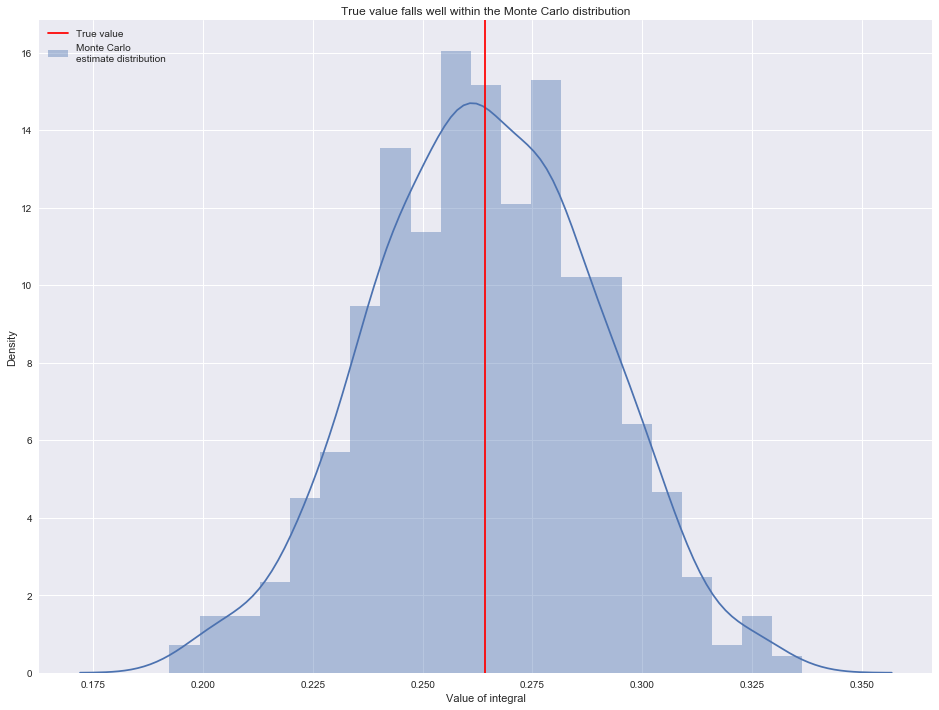

In [11]:
sns.distplot(repeated, label="Monte Carlo \nestimate distribution")
plt.axvline([exact], color='r', label="True value")
plt.title("True value falls well within the Monte Carlo distribution")
plt.xlabel("Value of integral")
plt.ylabel("Density")
plt.legend(loc='upper left')

<div class="answer-separator">
------------------------
</div>

<h4>1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

In [127]:
print("Standard error is {:.3f}".format(np.std(repeated)))
print("95% confidence interval: {}".format(np.round(np.percentile(repeated, [2.5, 97.5]), decimals=3)))

Standard error is 0.015
95% confidence interval: [0.236 0.293]


The true value was well within the 95% confidence interval.

<div class="answer-separator">
------------------------
</div>

<h4>1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $
</h4>

An appropriate change of variables is $x = \frac{1}{\theta}$. This means that $d\theta = -\frac{1}{x ^ 2} dx$ and thus

$$\int_M ^\infty \frac{\sin \theta ^ {24}}{\theta ^ 2} d \theta = \int_{1/M} ^ 0 \sin \left(\frac{1}{x^{24}} \right) x ^ 2 (-1 / x^2) dx = \int_0 ^ {1/M} \sin\left(\frac{1}{x^{24}}\right) dx \:.$$

This is an integral over a finite domain which we can solve using Monte Carlo integration.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sin
  """Entry point for launching an IPython kernel.


<function RandomState.rand>

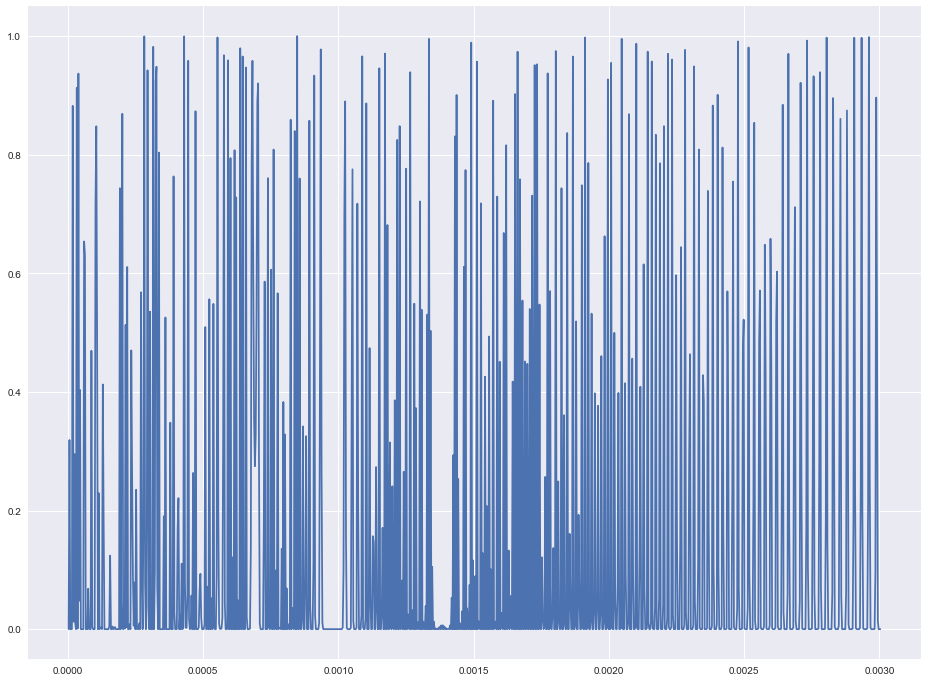

In [12]:
g = lambda x: np.sin(1 / x) ** 24
x = np.linspace(0, 1/333, 1000)
plt.plot(x, g(x))

np.random.rand

In [15]:
np.mean(np.random.uniform(low=0, high=1/1000, size=1000)) * 1 / 1000

4.93845241286306e-07

<div class="answer-separator">
------------------------
</div>

<h4>1.8. Based on your answer in 1.7 was your choice of M justified?
</h4>

<div class="answer">

<br>
The choice was justified in the sense that it guarnteed the desired accuracy.
From another point of view it was not justified: the actual contribution from the chosen $M = 333$ is much smaller than $0.001$, thus we could have moved $M$ much closer to zero. The main benefit of this would have been to **reduce the variance of the MC estimate**. This is due to the fact that with such a large bound $M$, we mostly zeros that do not contribute to the integral. By chosing a tighter bound, we would have more samples at points that actually matter.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 2: Rally to Me! 

**Some Coding required**

Suppose you observe the following data set $\mathbf{x}^{(0)} = (0.5, 2.5), \mathbf{x}^{(1)} = (3.2, 1.3), \mathbf{x}^{(2)} = (2.72, 5.84), \mathbf{x}^{(3)}= (10.047, 0.354)$. By convention, for any vector $\mathbf{x}$, we will denote the first component of $\mathbf{x}$ by $x_{1}$ and the second component by $x_{2}$. Suppose that the data is drawn from the same two-dimensional probability distribution with pdf $f_X$, that is, $\mathbf{x}^{(i)} \overset{iid}{\sim} f_X$, where
$$
f_X(\mathbf{x}) =  4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}.
$$
You should assume that $\lambda_1, \lambda_0 > 0$ and that $f_X$ is supported on the nonnegative quandrant of $\mathbb{R}^2$ (i.e. $f_X$ is zero when either component is negative). 

2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?  **Support your answer with full and rigorous analytic derivations.**

2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).


### Answers

<div class="answer-separator">
------------------------
</div>

<h4>2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?</h4>

We start by noting that the log-likelihood of a point $x = (x_1, x_2)$ is

$$ ll_X(x) = \log 4 + 2 \log \lambda_1 + \log x_1 + \log x_2 - \lambda_0 \left(x_1 ^ 2 + x_2 ^ 2\right)$$

and the log-likelihood of the sum of the 4 points $x^{(i)}$ given above is $ll = \sum_{i = 0} ^ 3 ll_X(x^{i})$.

Since the logarithm is a strictly monotonic function $\mathbb R \rightarrow \mathbb R$, we have that $\arg\min_{x \in \mathbb R^p} f(x) = \arg \min_{x\in \mathbb R^p} \log(f(x))$ for any map $f: \mathbb R^p \rightarrow \mathbb R$. Also, the maximum of the log-likelihood is given by finding zeros of its partial derivatives $\partial_{\lambda_i} ll_X$. Let us calculate these partial derivatives:

$$\frac{\partial ll} {\partial \lambda_0} = - (x_1 ^ 2 + x_2 ^ 2)$$
$$\frac{\partial ll} {\partial \lambda_1} = \frac{1} {\lambda_1} $$

Setting both to zero yields, $x_1 ^ 2 + x_2 ^ 2 = 0$ and $\lambda_1 = \infty$, which is, of course non-sense (the log-likelihood is defined $\forall (x_1, x_2)$ in the first quadrant).

If one thinks about the situation for a moment, the above answers "make sense": thinking of $\lambda_{0,1}$ to be independent parameters that we can vary arbitrarily, it never makes sense for $\lambda_1$ to be small: the term enters linearly into the log-likelihood with no relation to the data or the other parameter (it is simply $2 \log \lambda_1$ for every point), so increasing it will always increase the log-likelihood and thus the likelihood. Similarly, we don't get a useful answer for $\lambda_0$. 

This implies that $\lambda_0$ and $\lambda_1$ must satisfy a relation. The only condition we have for a a function $f: \mathbb R^2 \rightarrow \mathbb R^+$ to be a pdf, is that it integrates to one. Thus, let us compute the integral

$$ \int_{0} ^ {\infty} \int_{0} ^ \infty f_X(x_1, x_2) dx_1 dx_2 = \int_0^\infty \int_0^\infty 4 \lambda_1 ^ 2 x_1 x_2 \exp\left(-\lambda_0 \left(x_1 ^ 2 + x_2 ^ 2\right)\right) dx_1 dx_2 = \left( 2 \lambda_1 \int_0 ^ \infty x \exp(-\lambda_0 x ^ 2) dx\right) ^ 2 = I ^ 2$$

with $I = 2 \lambda_1 \int_0 ^ \infty x \exp(-\lambda_0 x ^ 2) dx$. Now, $I$, is easy to evaluate:

$$I = 2 \lambda_1 \int_0 ^ \infty \frac{-1}{2 \lambda_0}\frac{d}{dx} \exp(-\lambda_0 x ^ 2) dx = 
- \frac{\lambda_1}{\lambda_0} \exp(-\lambda_0 x ^ 2)\vert_{x = 0} ^ {x = \infty} = \frac{\lambda_1}{\lambda_0}$$

On the other hand, we know that $I$ should be equal to one, implying that $\lambda_0 = \lambda_1$, since both are assumed to be greater than zero.

Thus, from now on, we set $\lambda = \lambda_0 = \lambda_1$ and rewrite 

$$ ll = \log 4 + 2 \log \lambda + \log x_1 + \log x_2 - \lambda \left(x_1 ^ 2 + x_2 ^ 2\right)$$

Then, 

$$\frac{\partial ll}{\partial \lambda} = \sum_i \frac{2}{\lambda} - \left({x_{i,1}^2 + x_{i,2} ^ 2}\right) = 0 \:,$$

or equivalently

$$\lambda = \frac{8}{\sum_i r_i ^ 2}$$

with $r_i = x_{i,1} ^ 2 + x_{i, 2}^ 2$.

In [207]:
X = np.array([[0.5, 2.5],
              [3.2, 1.3],
              [2.72, 5.84],
              [10.047, 0.354]])

fitted_lambda = 8 / np.sum(X ** 2)
print("Fitted lambda: {:.4f}".format(fitted_lambda))

Fitted lambda: 0.0497


<h4>2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

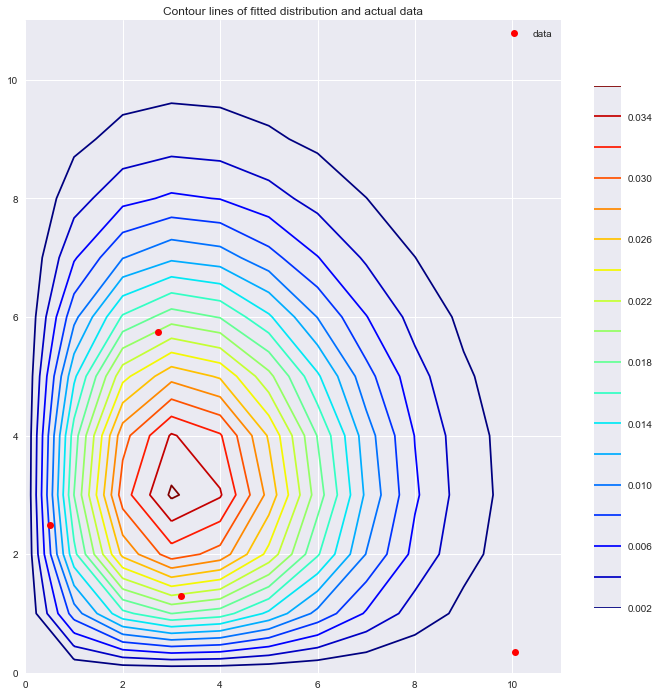

In [213]:
def f(x1, x2, lambda0, lambda1):
    return 4 * lambda1 ** 2 * x1 * x2 * np.exp(-lambda0 * (x1 ** 2 + x2 ** 2))

points = np.array([[0.5, 2.5], [3.2, 1.3], [2.72, 5.74], [10.047, 0.354]])

def plot_f(f, x_min, x_max, y_min, y_max, points=None, delta=0.025):
    """
    Plots function f between (`x_min`, `x_max`) and `(y_min, y_max)` with points spaced by `delta`.
    Additionally plots the points `points`.
    
    :param f: function to be plotted
    :param x_min: Lower x range of plotting region
    :param x_max: Upper x range of plotting region
    :param y_min: Lower y range of plotting region
    :param y_max: Upper y range of plotting region
    :param points: Additional points to be shown
    :param delta: Step size between two points
    
    :returns: Contour plot of f with additional points added in
    """
    x = np.arange(x_min, x_max, delta)
    y = np.arange(y_min, y_max, delta)
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    plt.figure(figsize=(12,12))
    CS = plt.contour(X, Y, Z, 20, cmap=cm.jet)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    

    plt.plot(points[:, 0], points[:, 1], 'ro', label='data')
    plt.legend()
    plt.title("Contour lines of fitted distribution and actual data")

    CS
    
plot_f(lambda x1, x2: f(x1, x2, fitted_lambda, fitted_lambda), 0, 12, 0, 12, points=points, delta=1)

<div class="answer-separator">
------------------------
</div>

## Question 3: Still Missing! 

**Coding required**

Recall from Homework 1 Question 2 that we explored working with missing data using the wine quality dataset from the UCI Machine Learning Repository.  Re-Read the data in the `wine_quality_missing.csv` into a pandas dataframe and store the dataframe in the variable `wine_df`. 

3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.

3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.

3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?


### Answers

<div class="answer-separator">
------------------------
</div>

<h4>3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.</h4>

In [132]:
wine_df = pd.read_csv("../data/wine_quality_missing.csv")
drop_imputed = wine_df.dropna()

print("Mean and standard deviation of drop imputed Ash dataset:")
drop_imputed['Ash'].describe()[['mean', 'std']]

Mean and standard deviation of drop imputed Ash dataset:


mean    2.369767
std     0.303232
Name: Ash, dtype: float64

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

In [183]:
def bootstrap_mean_std(x, N=1000):
    """
    Use non-parametric bootstrap to calculate mean and standard deviation
    of vector x.
    
    :param x: numpy array to bootstrad
    :param N: int number of boostrap iterations
    """
    bootstrapped = np.random.choice(x, size=(N, ) + np.shape(x))
    mean, std = np.std(np.mean(bootstrapped, axis=1)), np.std(np.std(bootstrapped, axis=1))
    return mean, std

bs_results = bootstrap_mean_std(drop_imputed['Ash'], 10000)
print("Standard error of mean is {:.3f}. Standard error of standard deviation is {:.3f}.".format(bs_results[0], bs_results[1]))

Standard error of mean is 0.046. Standard error of standard deviation is 0.037.


<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

In [204]:
mean_imputed = wine_df.fillna(wine_df.mean())

print("Mean and standard deviation of mean imputed Ash dataset:")
mean_imputed['Ash'].describe()[['mean', 'std']]

Mean and standard deviation of mean imputed Ash dataset:


mean    2.366218
std     0.265022
Name: Ash, dtype: float64

<div class="answer-separator">
------------------------
</div>

<h4>3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

In [205]:
bs_results = bootstrap_mean_std(mean_imputed['Ash'], 10000)
print("Standard error of mean is {:.3f}. Standard error of standard deviation is {:.3f}.".format(bs_results[0], bs_results[1]))

Standard error of mean is 0.020. Standard error of standard deviation is 0.019.


<div class="answer-separator">
------------------------
</div>

<h4>3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?</h4>

There's quite a big difference between the standard errors:

Drop Imputed Mean  | Mean Imputed Mean | Drop Imputed Standard error | Mean imputed standard error
-------------------|-------------------|-----------------------------|------------------------------
0.046  | 0.020 |0.037 | 0.019

The reason is that we substitute a **single value** that is **equal to the mean** of the "Ash" column. This means that the imputed values do not contribute any variance of this column.

<div class="answer-separator">
------------------------
</div>